Building Strong Fundamentals Of EDA In Python

IRIS DATASET

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
!pip install ucimlrepo 
from ucimlrepo import fetch_ucirepo 

In [3]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [4]:
iris = pd.concat([X,y],axis=1)
iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [9]:
iris.shape

(150, 5)

In [10]:
iris.duplicated().sum()

3

In [11]:
iris[iris.duplicated()]

,sepal length,sepal width,petal length,petal width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [12]:
iris.rename({'class':'species'}, axis=1, inplace=True)
iris

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Exploratory Data Analysis (EDA)

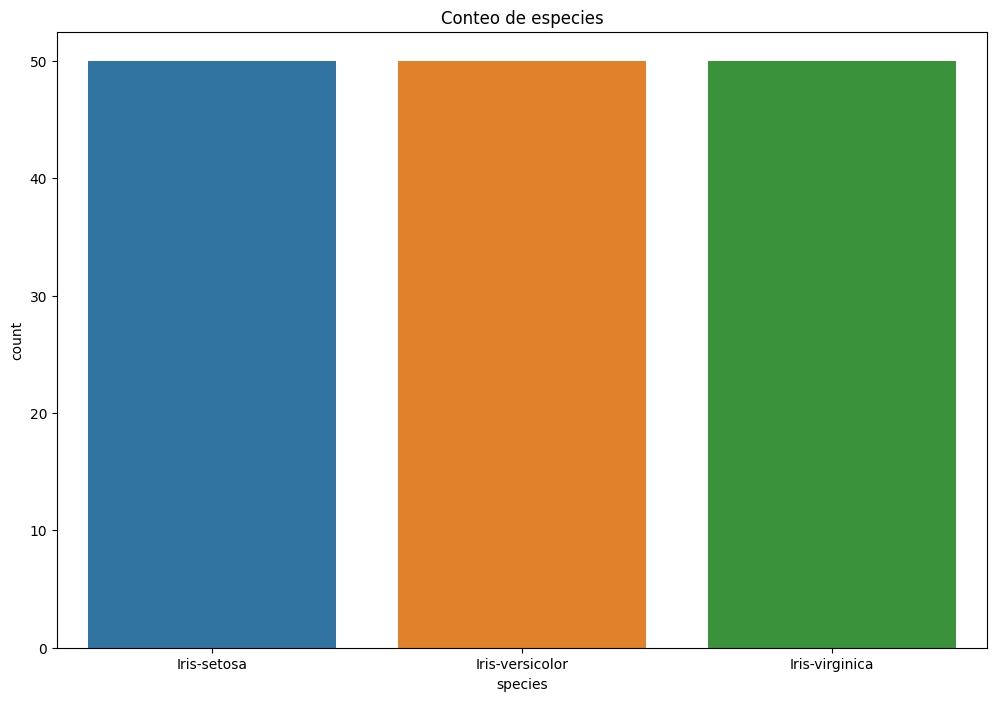

In [14]:
plt.figure(figsize=(12,8))
plt.title('Conteo de especies')
sns.countplot(x='species',data=iris,hue='species')
plt.show()

<Figure size 1200x800 with 0 Axes>

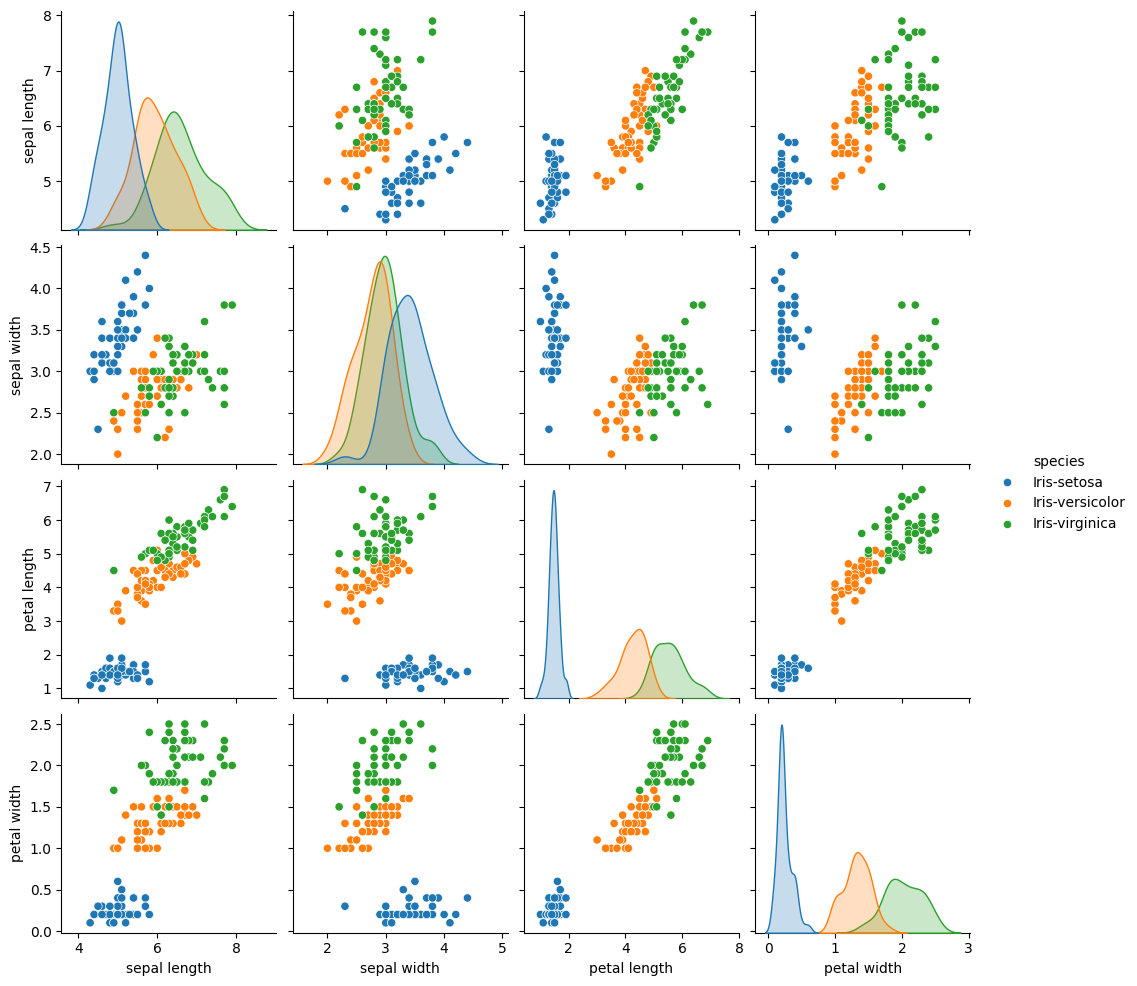

In [15]:
plt.figure(figsize=(12,8))
sns.pairplot(iris,hue='species')
plt.show()

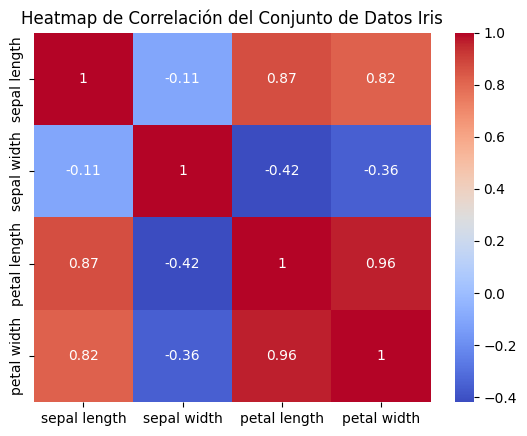

In [16]:
# Seleccionar solo las columnas numéricas
df_numeric = iris.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Generar el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlación del Conjunto de Datos Iris')
plt.show()


In [17]:
iris.columns.unique()

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'species'],
      dtype='object')

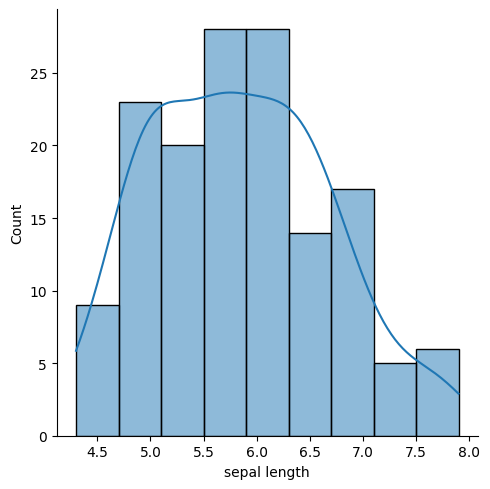

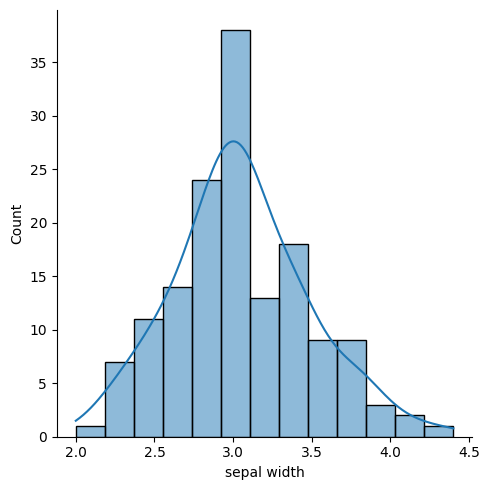

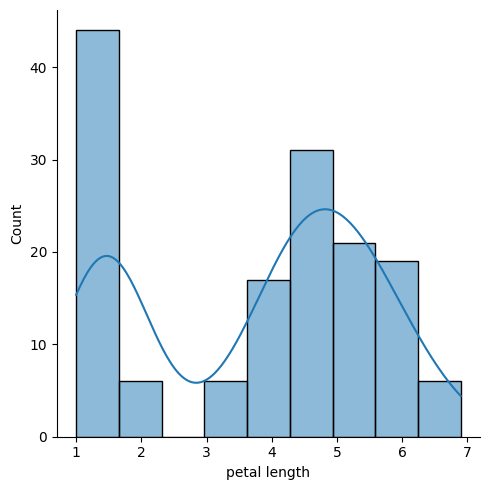

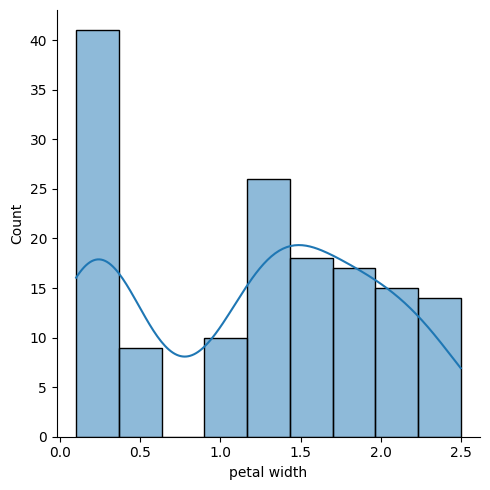

In [18]:

for column_name in iris.columns.unique():
    if column_name != 'species':
        sns.displot(iris[column_name],kde=True)
    

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()        

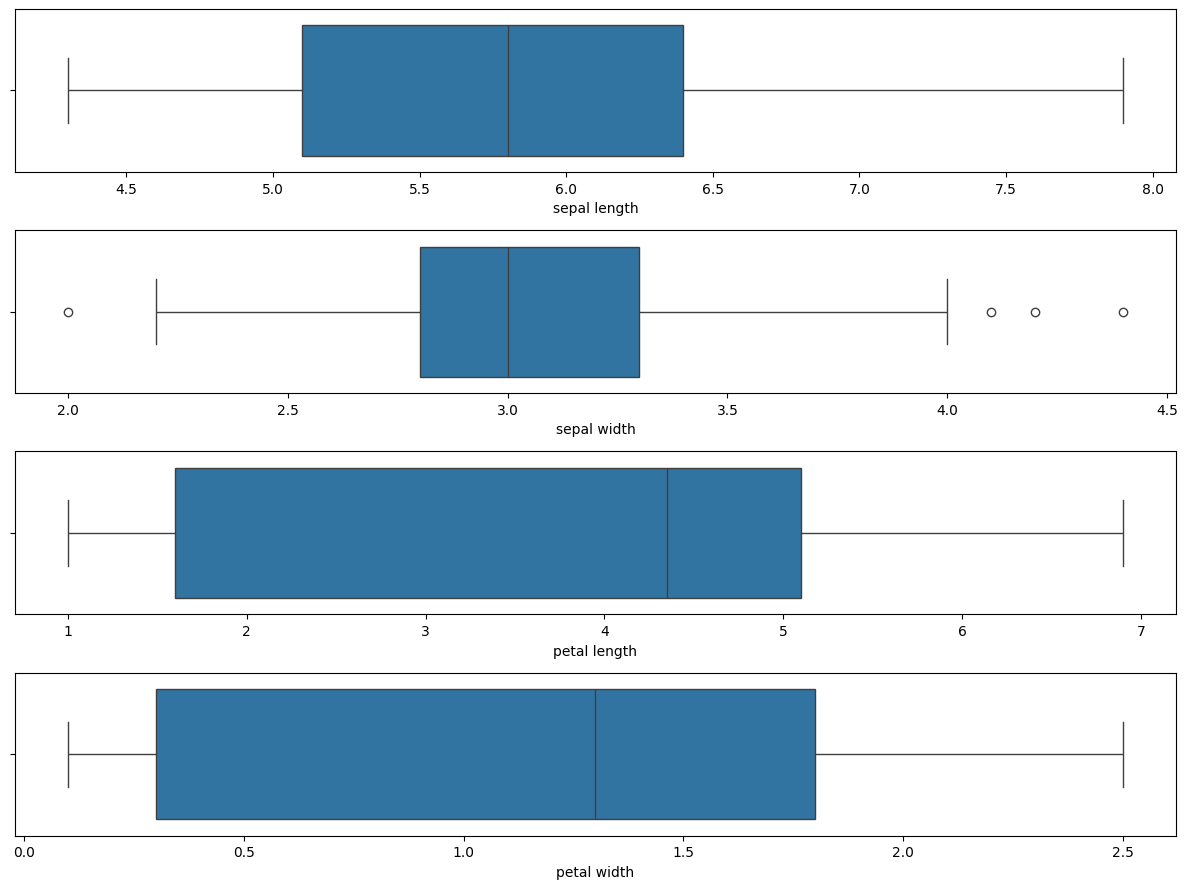

In [19]:
# Creamosuna figura de 4 subplots
i=0
f,axes = plt.subplots(4, figsize=(12, 9))
for col in iris.columns.unique():
    if col != 'species':
        sns.boxplot(x=col, data=iris, ax=axes[i], hue_order=iris['species'],legend=False)
        i = i+1

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()      

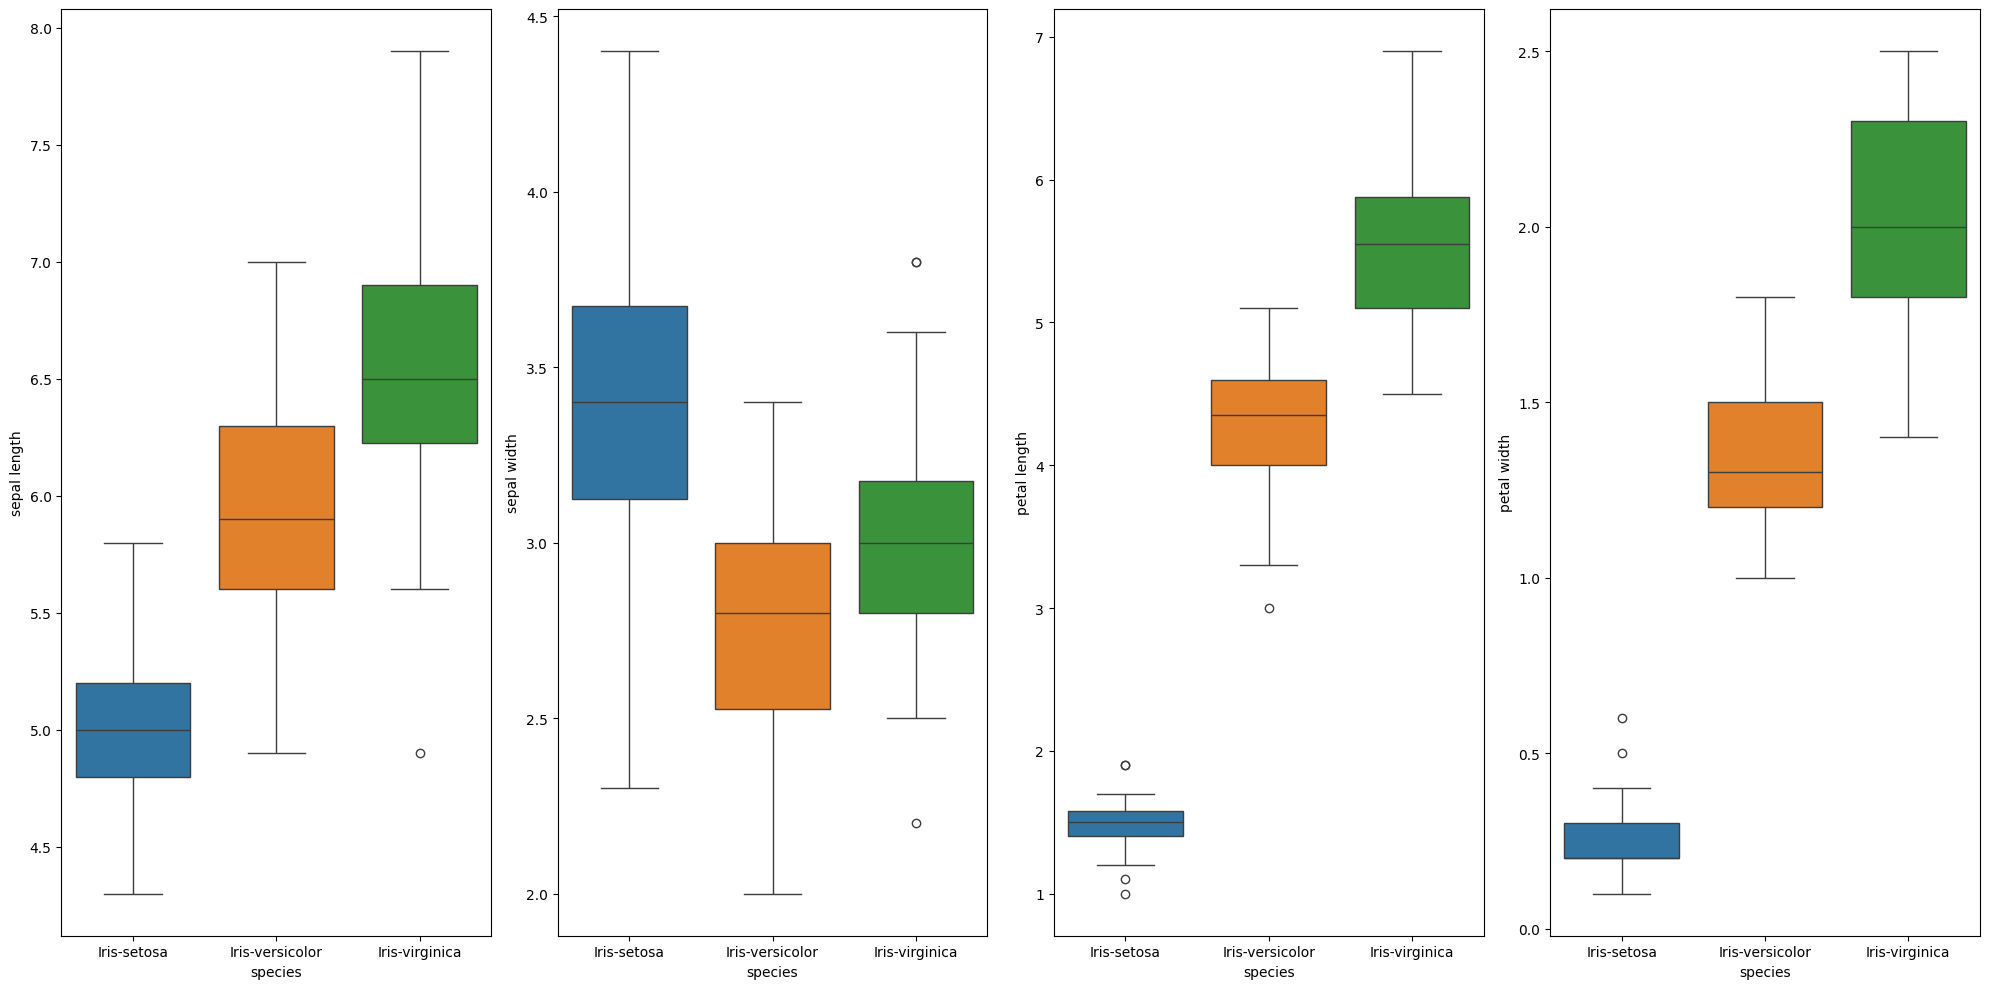

In [20]:
# creamos una figura de 4 subplots
i=0
f,axes = plt.subplots(1,4, figsize=(20,10))
for col in iris.columns.unique():
    if col != 'species':
        sns.boxplot(x='species',y=col, data=iris, ax=axes[i], hue='species',legend=False)
        i = i+1

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()  

In [21]:
# filtramos el DF con la especie llamada iris setosa
setosa_df = iris[iris['species'] == 'Iris-setosa']
# Calcula el valor por debajo del cual se encuentra el 97%
setosa_df['petal length'].quantile(0.97)

1.806

In [22]:
# Calculaa el valor que se encuentra por debajo del 3% de los datos 
setosa_df['petal length'].quantile(0.03)

1.147

In [23]:
# Filtraamos el dataset con la especie iris_setosa con las celdsa  que son menores al percentil 0.03 y mayores al percentil 0.97 
iris[(iris['species'] == 'Iris-setosa') & (iris['petal length'] > setosa_df['petal length'].quantile(0.97)) | (iris['petal length'] < setosa_df['petal length'].quantile(0.03))]

,sepal length,sepal width,petal length,petal width,species
13,4.3,3.0,1.1,0.1,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
24,4.8,3.4,1.9,0.2,Iris-setosa
44,5.1,3.8,1.9,0.4,Iris-setosa


In [24]:
# Las filas que cumplieron con la condicion de ser mayores o menores a los percentiles las eliminaremos
iris.drop(index=[13,22,24,44]).head(15)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


TITANIC

In [25]:
df = pd.read_csv('./datasets/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
df.shape

(891, 12)

In [30]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [32]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

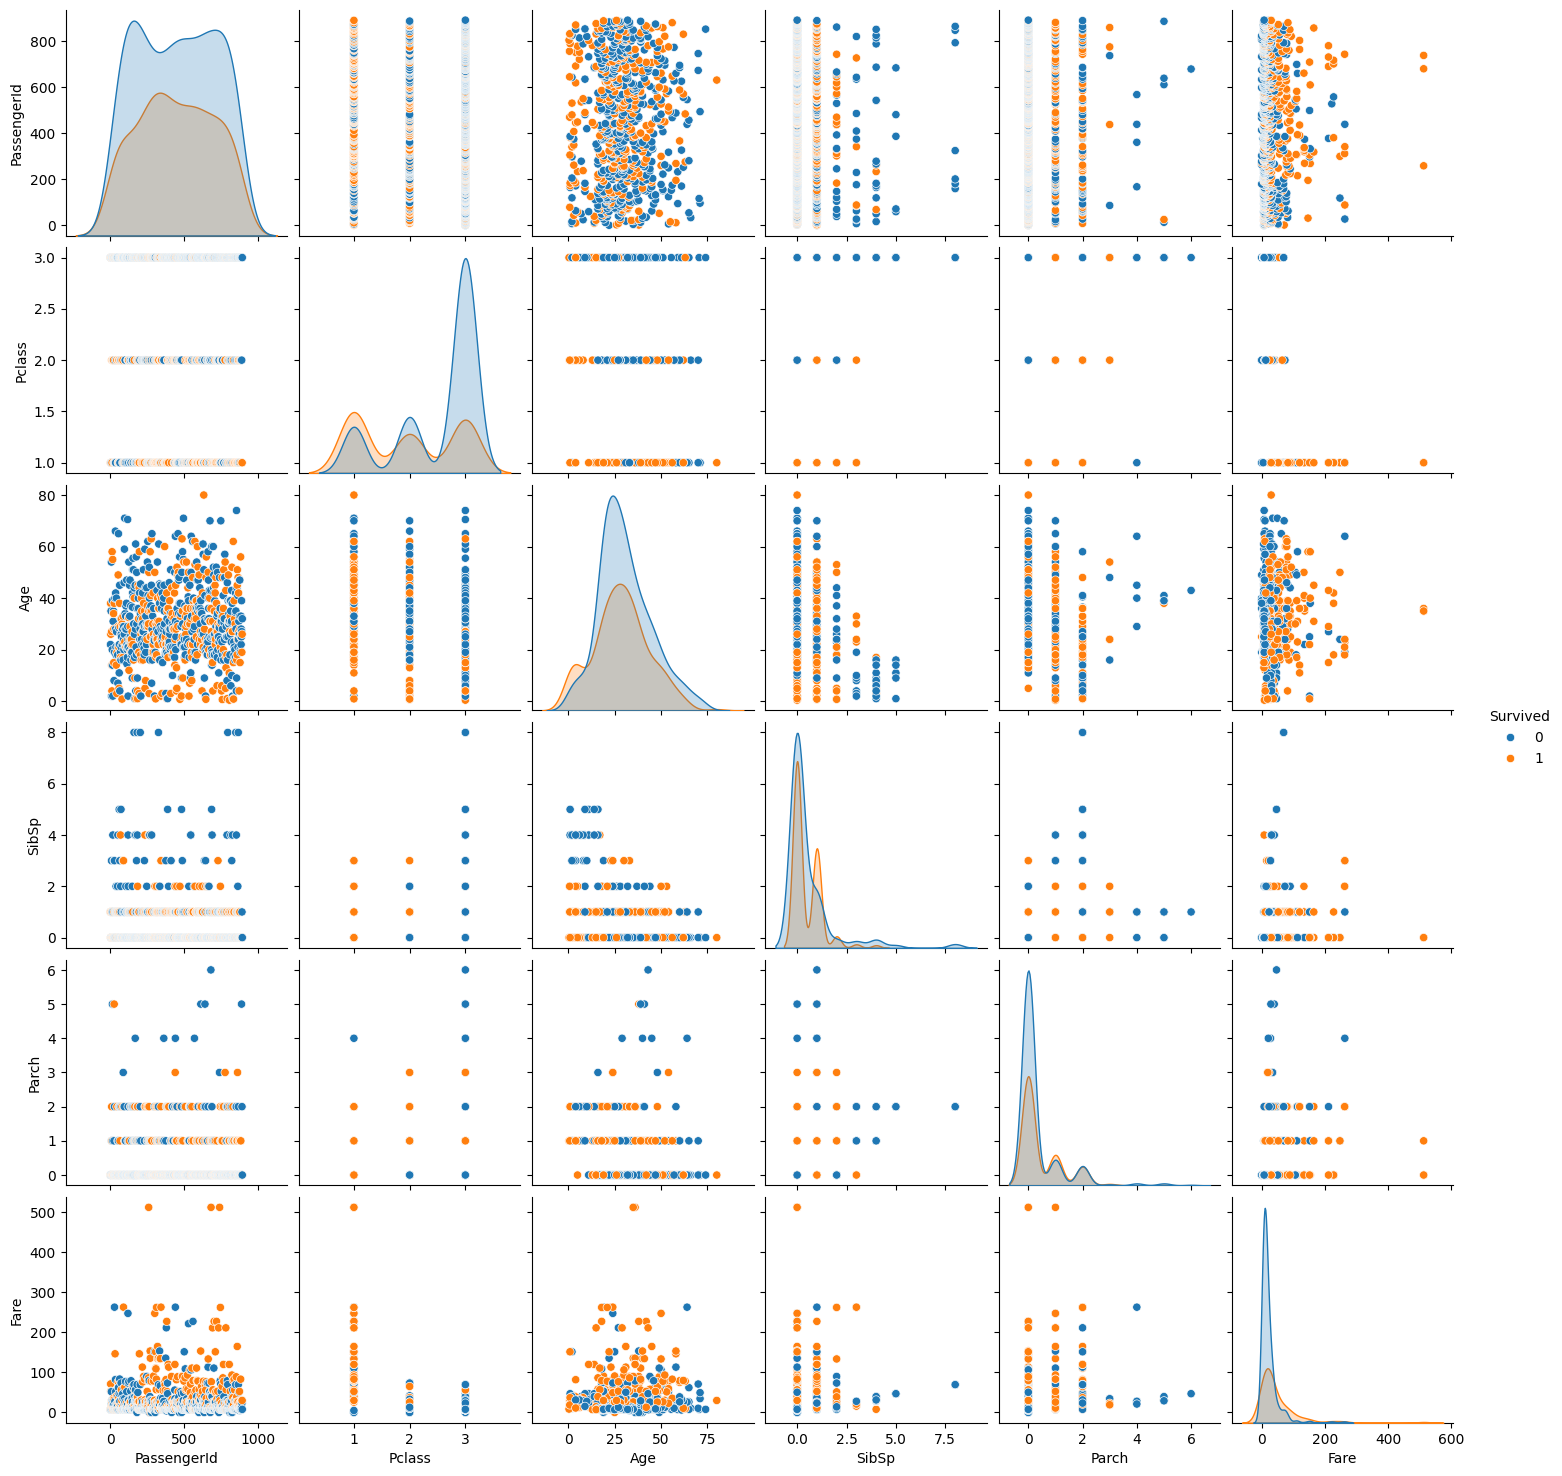

In [33]:
sns.pairplot(df, hue='Survived')
plt.show()

In [34]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

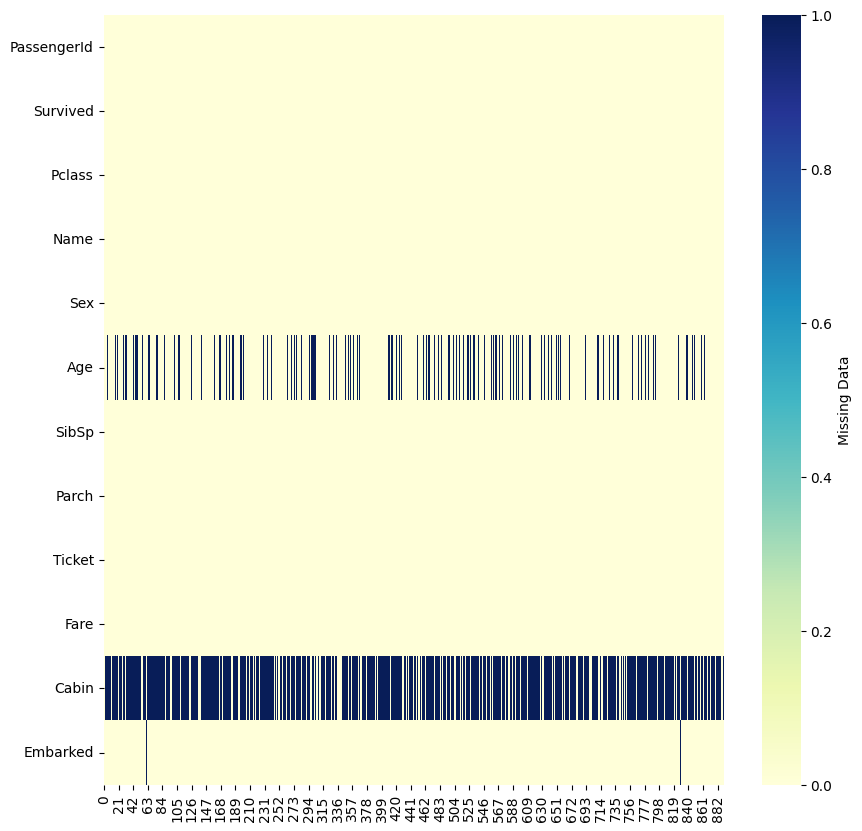

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.show()



In [36]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [37]:
df.drop(columns=['PassengerId','Cabin','Ticket'],inplace=True)

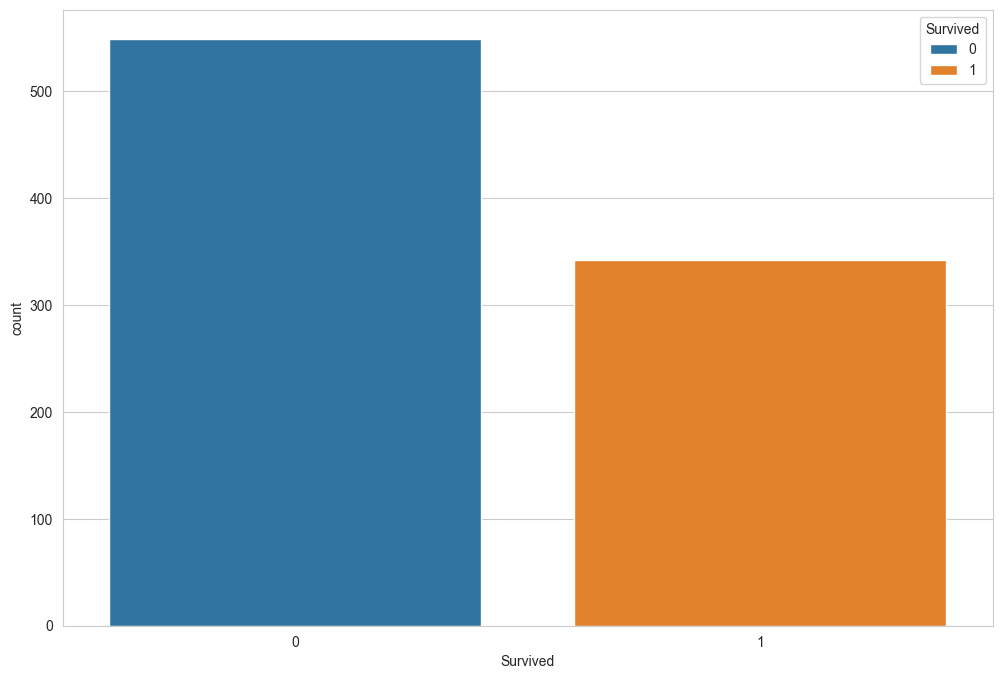

In [38]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df, hue='Survived')
plt.show()

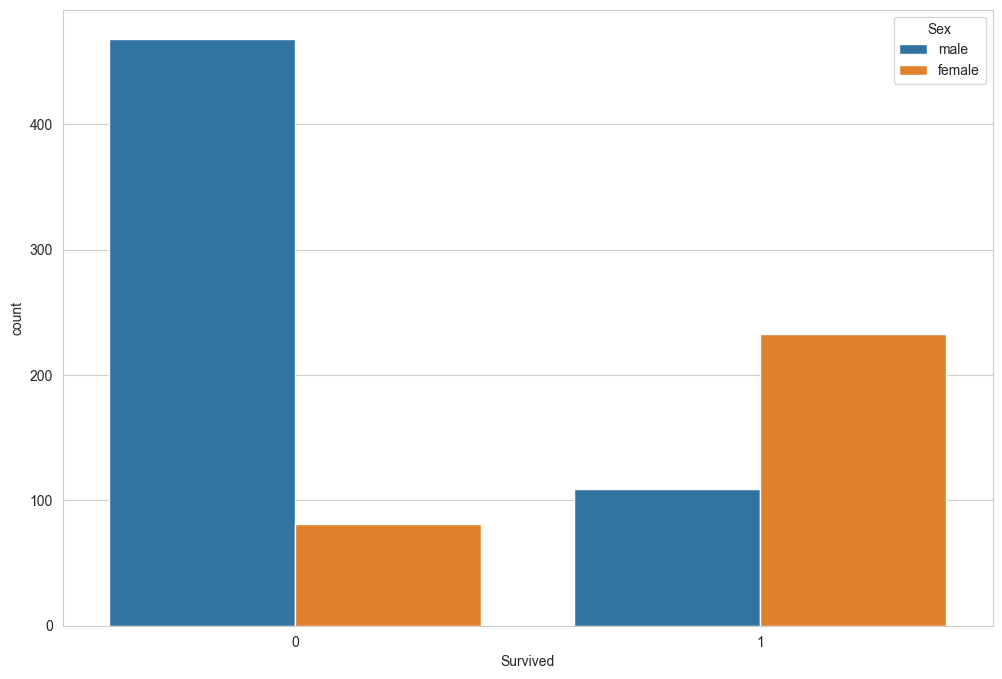

In [39]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data=df)
plt.show()

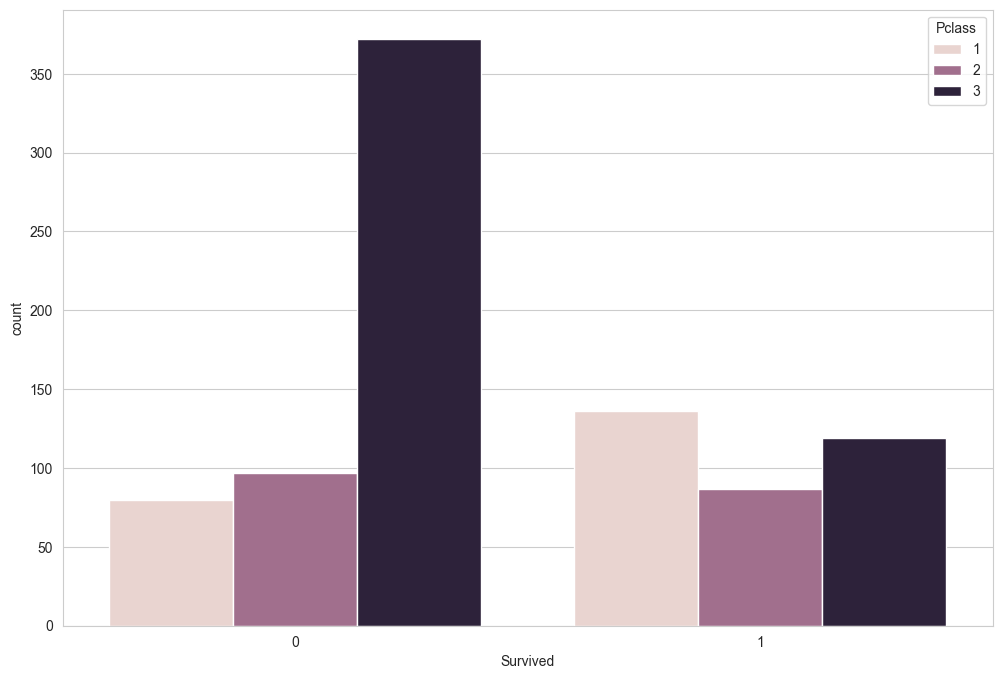

In [40]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data=df)
plt.show()

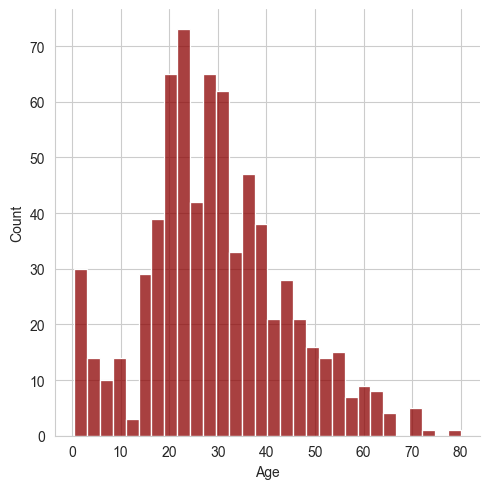

In [41]:
sns.displot(df['Age'].dropna(),kde=False,color='darkred',bins=30)
plt.show()

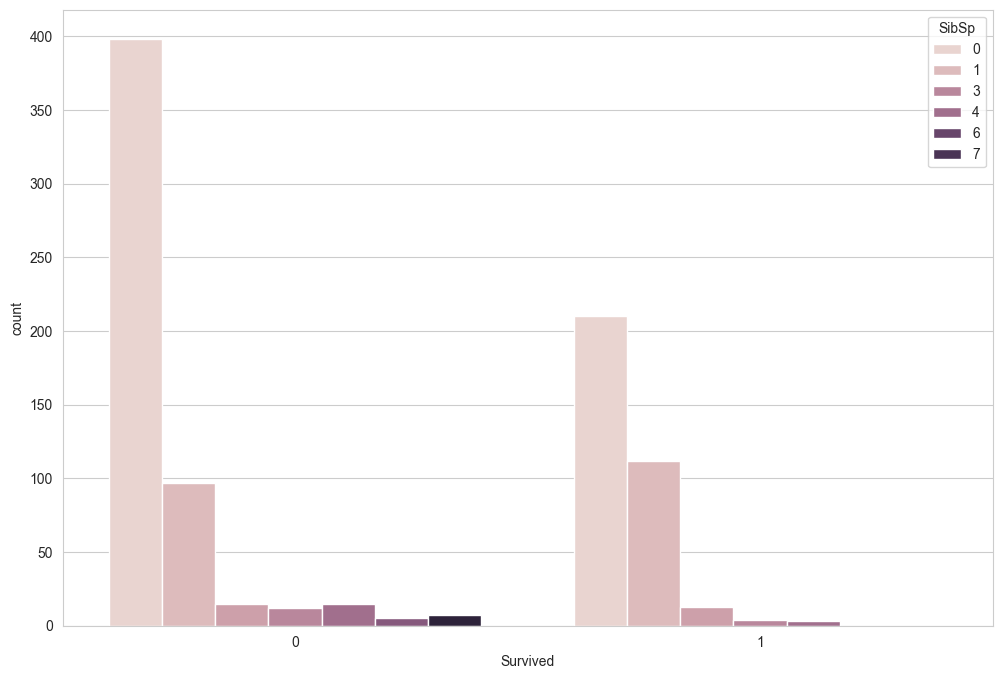

In [42]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='SibSp', data=df)
plt.show()

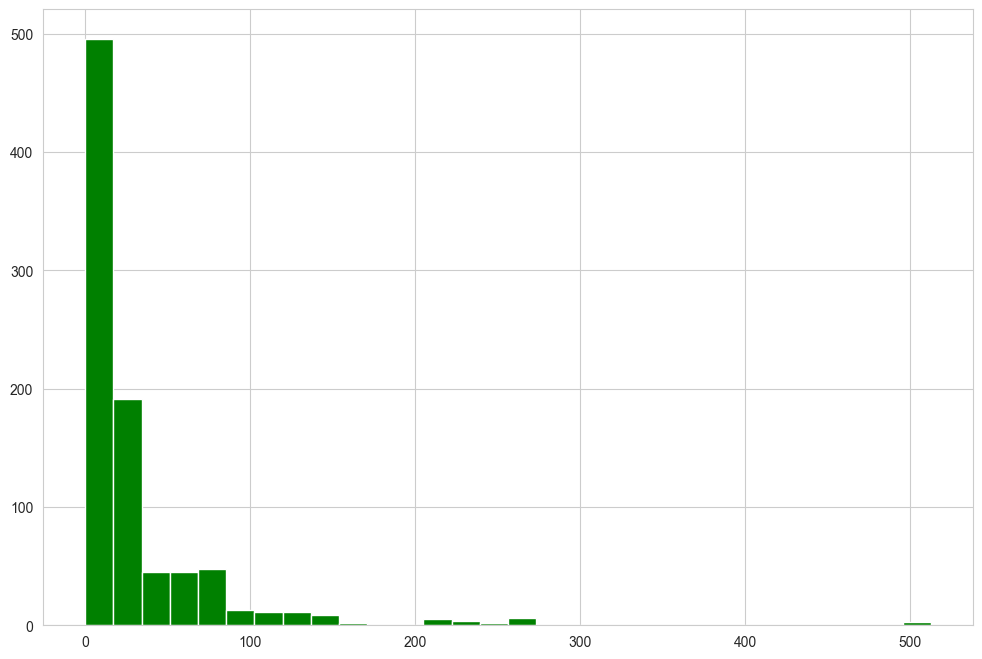

In [43]:
df['Fare'].hist(color='green',bins=30, figsize=(12,8))
plt.show()

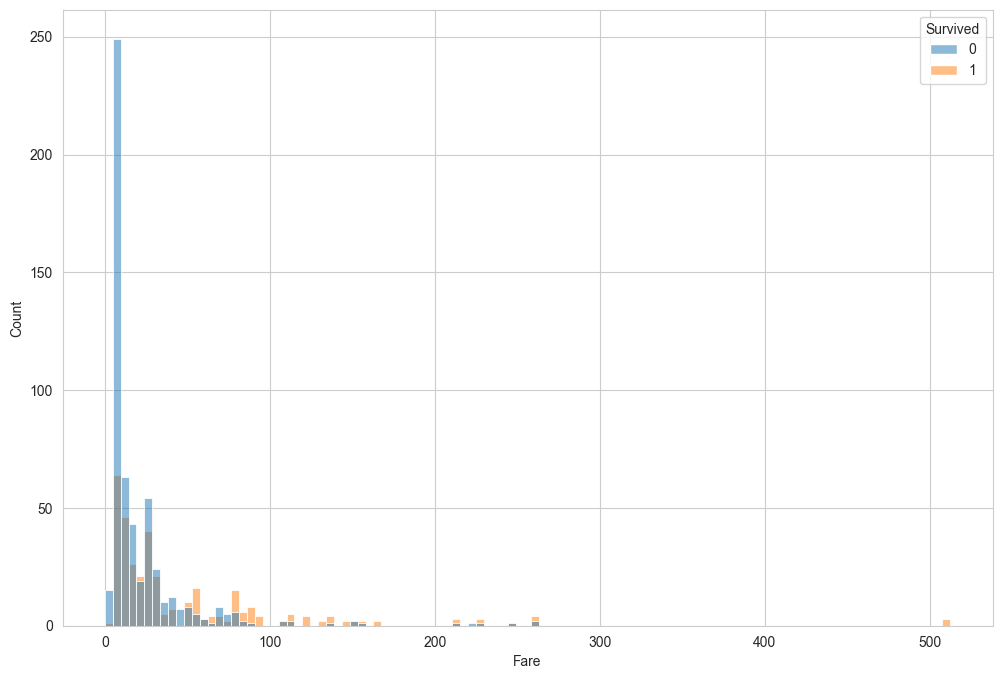

In [44]:
plt.figure(figsize=(12,8))
sns.histplot(x='Fare', hue='Survived', data=df)
plt.show()

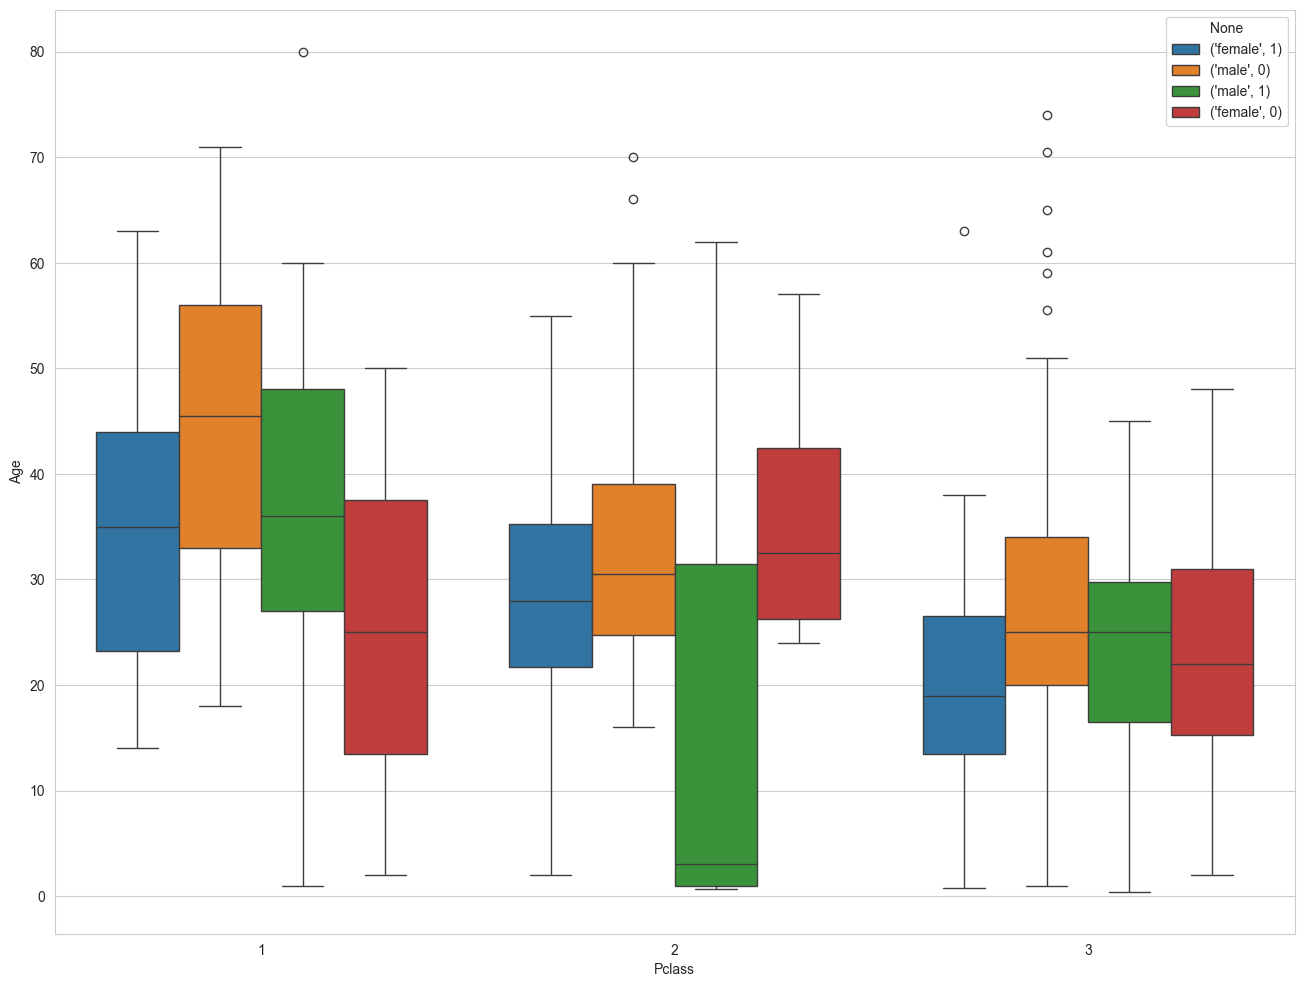

In [45]:
plt.figure(figsize=(16,12))
sns.boxplot(x='Pclass',y='Age',hue=df[['Sex','Survived']].apply(tuple,axis= 1 ),data=df)
plt.show()

In [46]:
def imput_age(cols):
    age = cols[0]
    pclass = cols[1]
    survived = cols[2]
    gender = cols[3]
    
    if pd.isnull(age):
        if pclass == 1 and survived == 0 and gender == 'male':
            return 46 
        elif pclass == 1 and survived == 1 and gender == 'male':
            return 35 
        elif pclass == 1 and survived == 0 and gender == 'female':
            return 25 
        elif pclass == 1 and survived == 1 and gender == 'female':
            return 35
        elif pclass == 2 and survived == 0 and gender == 'male':
            return 31 
        elif pclass == 2 and survived == 1 and gender == 'male':
            return 3 
        elif pclass == 2 and survived == 0 and gender == 'female':
            return 33 
        elif pclass == 2 and survived == 1 and gender == 'female':
            return 28
        elif pclass == 3 and survived == 0 and gender == 'male':
            return 25 
        elif pclass == 3 and survived == 1 and gender == 'male':
            return 25 
        elif pclass == 3 and survived == 0 and gender == 'female':
            return 22 
        elif pclass == 3 and survived == 1 and gender == 'female':
            return 19  
        else:
            return(age) # esto contiene cualquier valor nulo Nan o fuera de el rango
    else:
        return(age)     

In [47]:
df['Age'] = df[['Age','Pclass','Survived','Sex']].apply(imput_age,axis= 1 )

C:\Users\famil\AppData\Local\Temp\ipykernel_6960\2208671755.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = cols[0]
C:\Users\famil\AppData\Local\Temp\ipykernel_6960\2208671755.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass = cols[1]
C:\Users\famil\AppData\Local\Temp\ipykernel_6960\2208671755.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  survived = cols[2]
C:\Users\famil\AppData\Local\Temp\ipykernel_6960\2

In [48]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [49]:
df.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,25.0,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [50]:
def name_title(name):
    
    if ( 'Mr' ) in name:
        return('Mr')
    elif ('Mrs') in name:
        return('Mrs')
    elif ('Miss') in name:
        return('Miss')
    elif ('Ms') in name:
        return('Miss')
    elif ('Rev') in name: 
        return('Rev')
    elif ('Master') in name: 
        return('Master')
    elif ('Don') in name: 
        return('Don')
    elif ('Dr') in name: 
        return('Dr')
    elif ('Mme') in name: 
        return('Mme')
    elif ('Major') in name: 
        return('Major')
    elif ('Mlle') in name: 
        return('Mlle')
    elif ('Col') in name: 
        return('Col')
    elif ('Countess') in name: 
        return('Countess')
    elif ('Leader') in name: 
        return('Leader')
    elif ('Jonkheer') in name: 
        return('Jonkheer')
    elif ('Capt') in name: 
        return('Capt')
    else:
        return (np.nan)
      

In [51]:
df['title'] = df['Name'].apply(name_title)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mr
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mr
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,23.4500,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


In [52]:
df[df['title'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,title


In [53]:
gender = pd.get_dummies(df['Sex'], drop_first=True).astype(int)
embark = pd.get_dummies(df['Embarked'], drop_first=True).astype(int)
title = pd.get_dummies(df['title']).astype(int)

In [54]:
df.drop(columns=['Sex','Embarked','Name','title'],axis=1,inplace=True)

In [55]:
df = pd.concat([df,gender,embark,title],axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Capt,...,Don,Dr,Jonkheer,Major,Master,Miss,Mlle,Mme,Mr,Rev
0,0,3,22.0,1,0,7.2500,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [56]:
df.drop(columns=['Jonkheer'],axis=1, inplace=True)

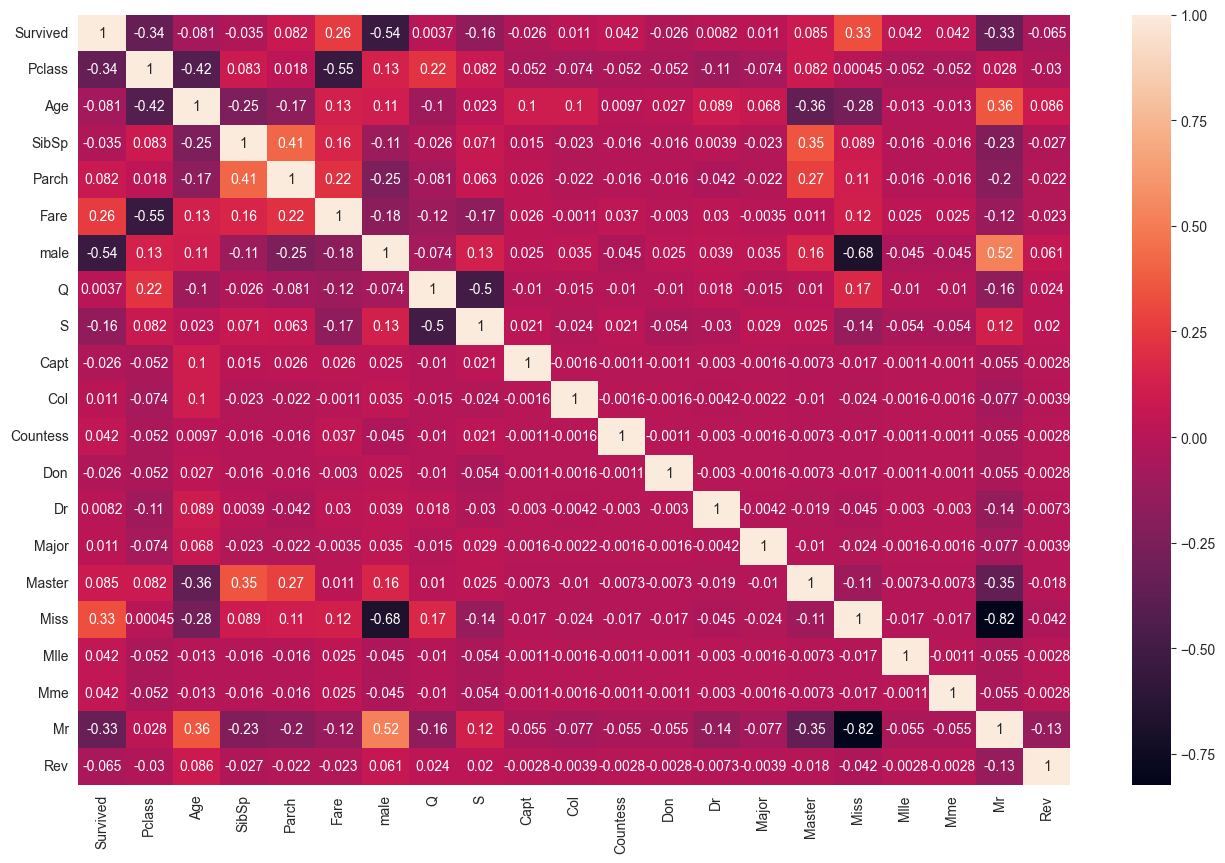

In [57]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [58]:
df.to_csv('./datasets/titanic_clean.csv')

HOTEL BOOKING

In [59]:
hotel = pd.read_csv('./datasets/hotel_bookings.csv')

In [60]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [61]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [62]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [63]:
hotel[hotel.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [64]:
hotel.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

DATA CLEANING

In [65]:
hotel.drop(columns=['company','agent'],inplace=True)

In [66]:
hotel = hotel[hotel['adults'] != 0 ]

In [67]:
hotel = hotel[hotel['adr'] > 0 ]

In [68]:
hotel['arrival_date'] = hotel['arrival_date_month'] + " " + hotel['arrival_date_day_of_month'].astype(str) + " " + hotel['arrival_date_year'].astype(str)
hotel['arrival_date'] = pd.to_datetime(hotel['arrival_date'])

In [69]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117182 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           117182 non-null  object        
 1   is_canceled                     117182 non-null  int64         
 2   lead_time                       117182 non-null  int64         
 3   arrival_date_year               117182 non-null  int64         
 4   arrival_date_month              117182 non-null  object        
 5   arrival_date_week_number        117182 non-null  int64         
 6   arrival_date_day_of_month       117182 non-null  int64         
 7   stays_in_weekend_nights         117182 non-null  int64         
 8   stays_in_week_nights            117182 non-null  int64         
 9   adults                          117182 non-null  int64         
 10  children                        117178 non-null  float64     

In [70]:
hotel.drop('arrival_date_week_number', inplace=True, axis=1)

In [71]:
hotel['country'].mode()

0    PRT
Name: country, dtype: object

In [72]:
hotel.loc[hotel['country'] == 'PRT', 'country'].count()

46989

In [73]:
hotel['country'].fillna(hotel['country'].mode()[0], inplace=True)

C:\Users\famil\AppData\Local\Temp\ipykernel_6960\3293592920.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel['country'].fillna(hotel['country'].mode()[0], inplace=True)


In [74]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [75]:
hotel['children'].median()

0.0

In [76]:
hotel['children'] = hotel['children'].fillna(hotel['children'].median())


In [77]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [78]:
hotel['total_guest'] = hotel['adults'] + hotel['children'] + hotel['babies']

In [79]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_guest
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1.0
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1.0
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2.0
5,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2.0
6,Resort Hotel,0,0,2015,July,1,0,2,2,0.0,...,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03,2015-07-01,2.0


Text(0, 0.5, 'Reservation count')

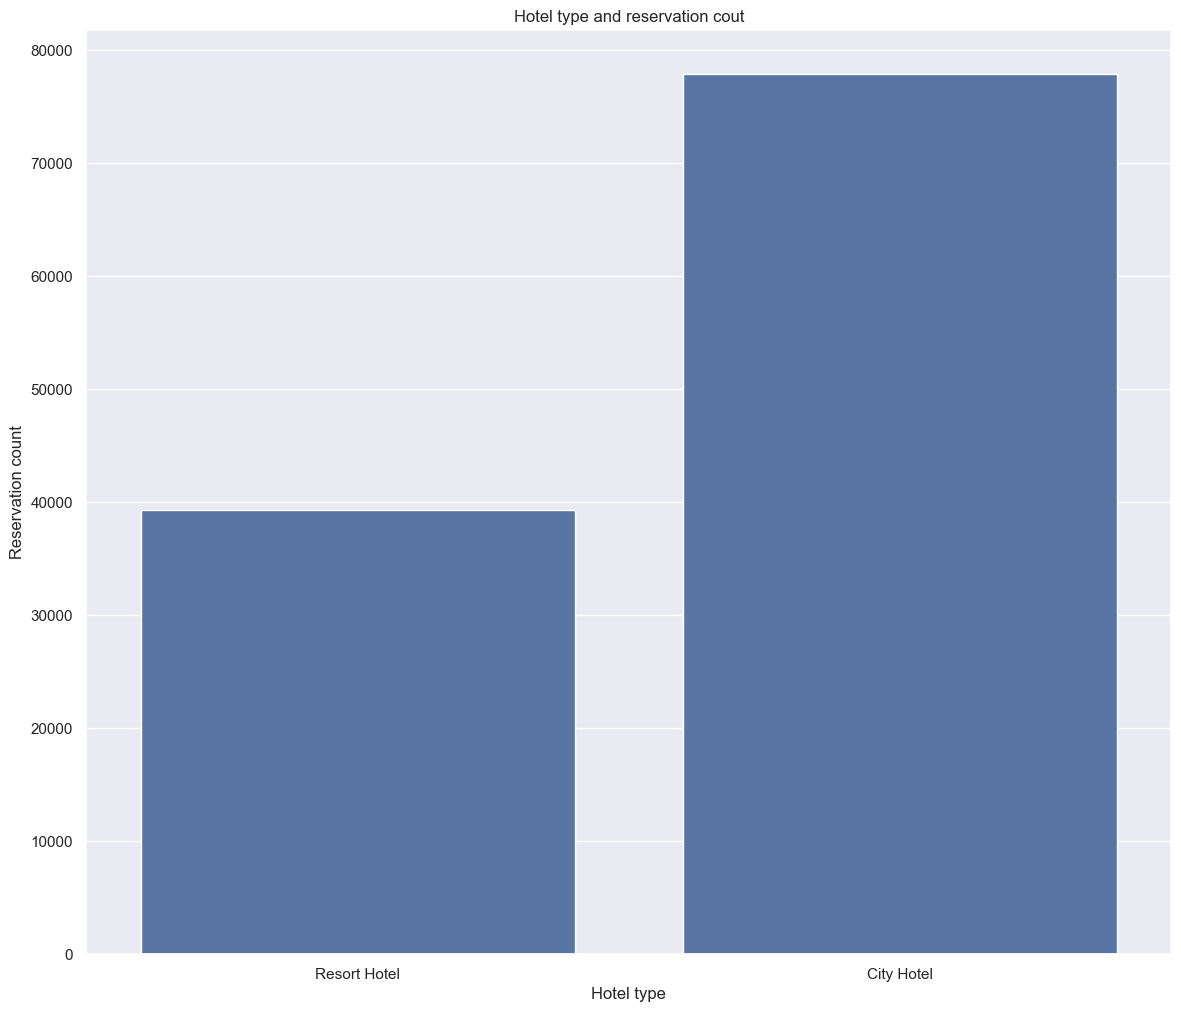

In [82]:
sns.set(rc={'figure.figsize':(14,12)})
graph = sns.countplot(x='hotel',data=hotel)
graph.set(title='Hotel type and reservation cout')
graph.set_xlabel('Hotel type', fontsize=12)
graph.set_ylabel('Reservation count', fontsize=12)

In [84]:
hotel['hotel'].value_counts(normalize=True)

hotel
City Hotel      0.664565
Resort Hotel    0.335435
Name: proportion, dtype: float64

Text(0, 0.5, 'Reservation count')

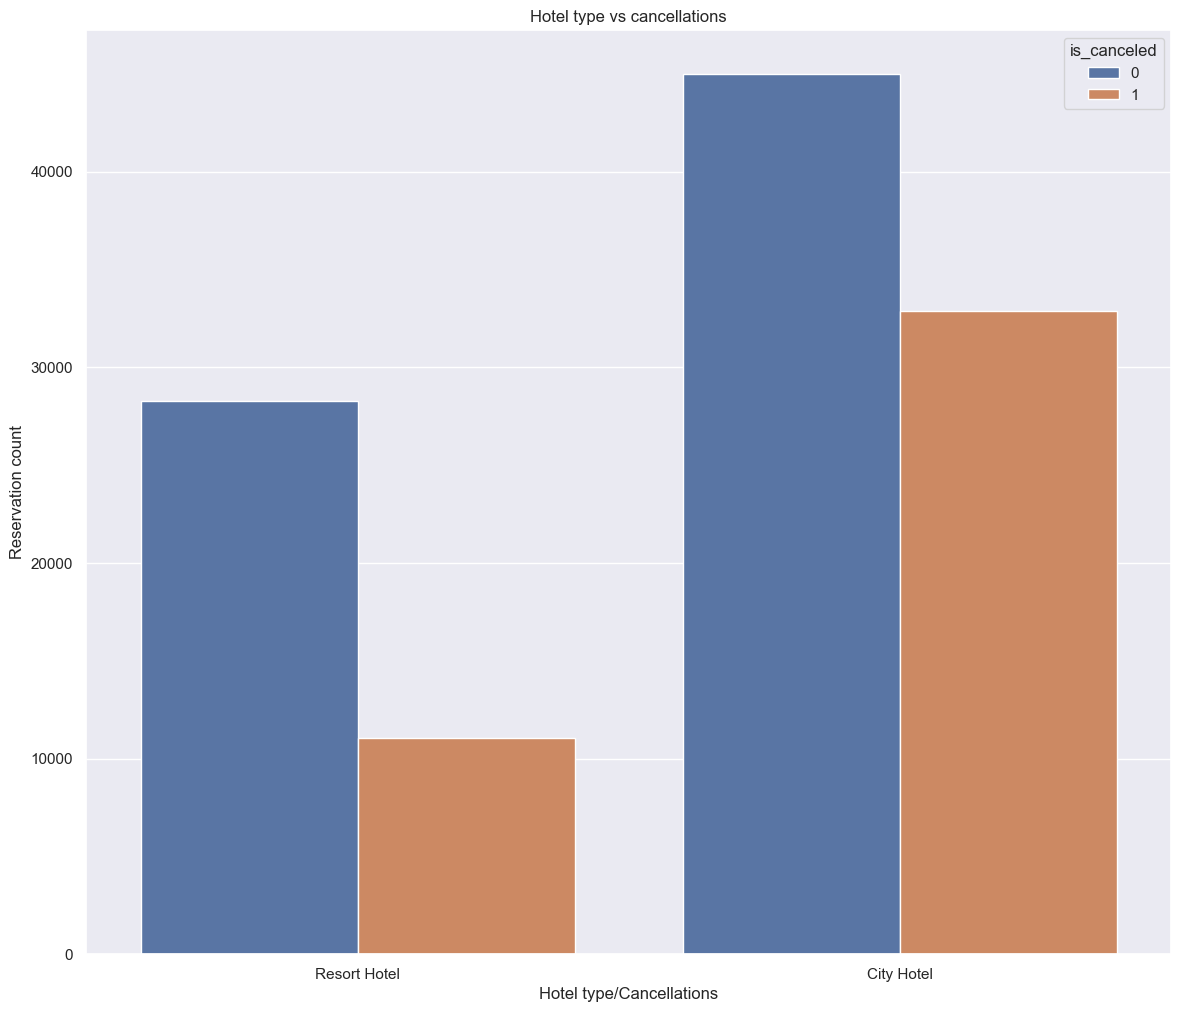

In [87]:
sns.set(rc={'figure.figsize':(14,12)})
graph = sns.countplot(x='hotel',hue='is_canceled',data=hotel)
graph.set(title='Hotel type vs cancellations')
graph.set_xlabel('Hotel type/Cancellations', fontsize=12)
graph.set_ylabel('Reservation count', fontsize=12)

Text(0, 0.5, 'Reservation count')

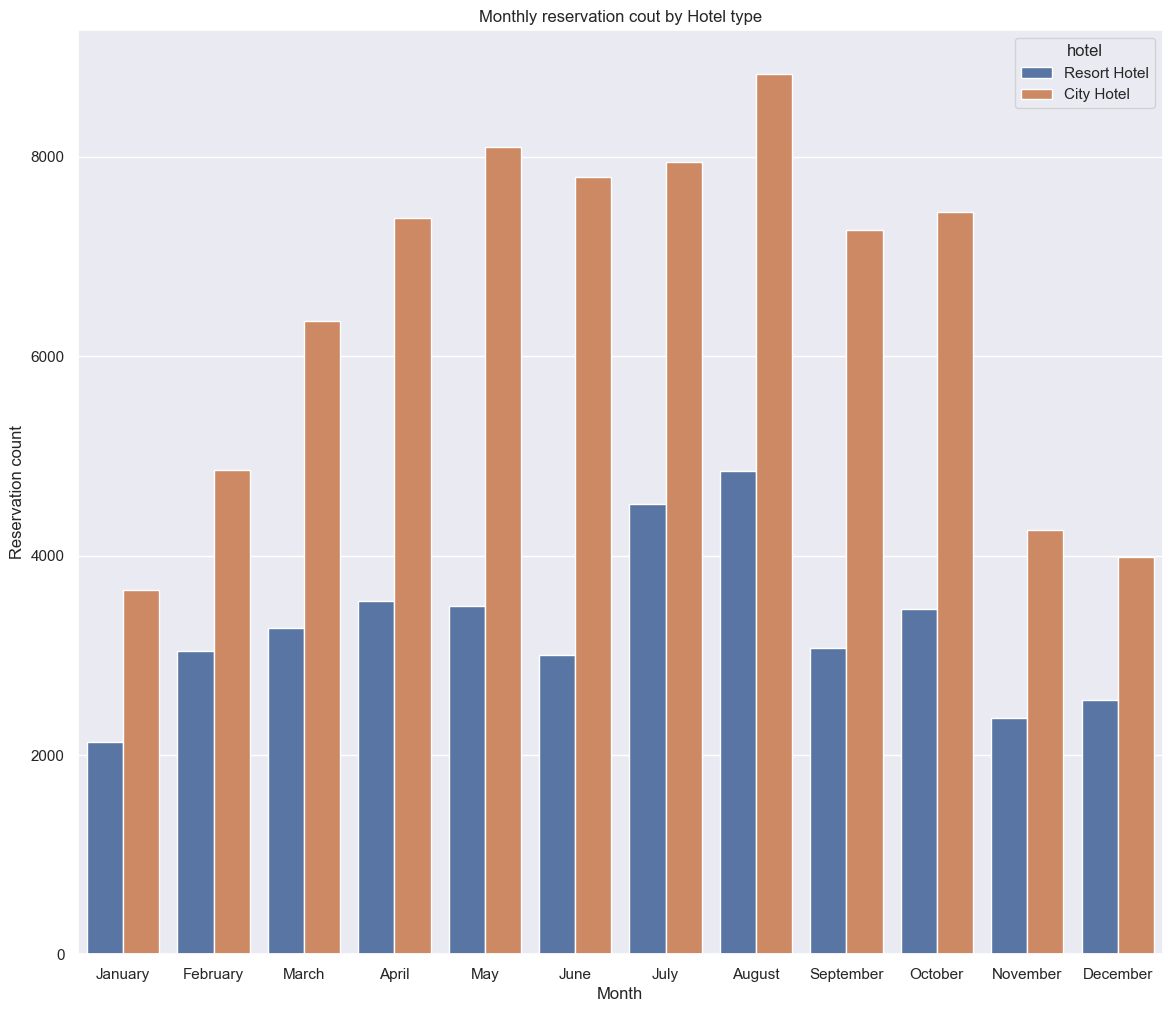

In [88]:
sns.set(rc={'figure.figsize':(14,12)})
graph = sns.countplot(x='arrival_date_month',
                      data=hotel,
                      hue='hotel',
                      order=['January','February','March','April','May','June','July','August','September','October','November','December'])
graph.set(title='Monthly reservation cout by Hotel type')
graph.set_xlabel('Month', fontsize=12)
graph.set_ylabel('Reservation count', fontsize=12)

Del gtrafico anterior podemosobservar que el hotel se mantiene en alta demanda durante juio y agosto, mientras que en invierno de noviembre a febrero la demanda es baja

Text(0, 0.5, 'Reservation count')

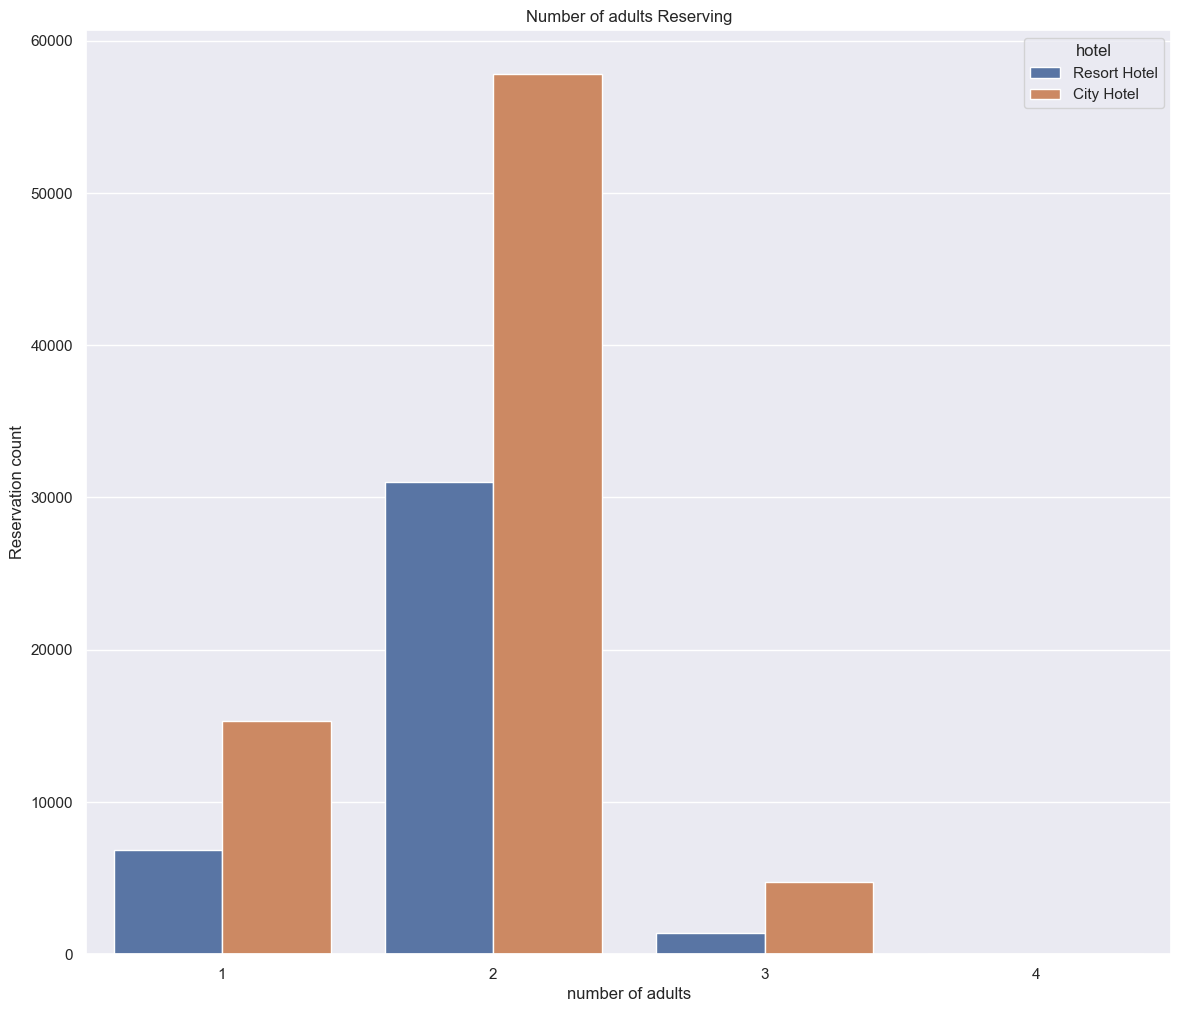

In [89]:
sns.set(rc={'figure.figsize':(14,12)})
graph = sns.countplot(x='adults',data=hotel,hue='hotel')
graph.set(title='Number of adults Reserving')
graph.set_xlabel('number of adults', fontsize=12)
graph.set_ylabel('Reservation count', fontsize=12)

Text(0, 0.5, 'Reservation count')

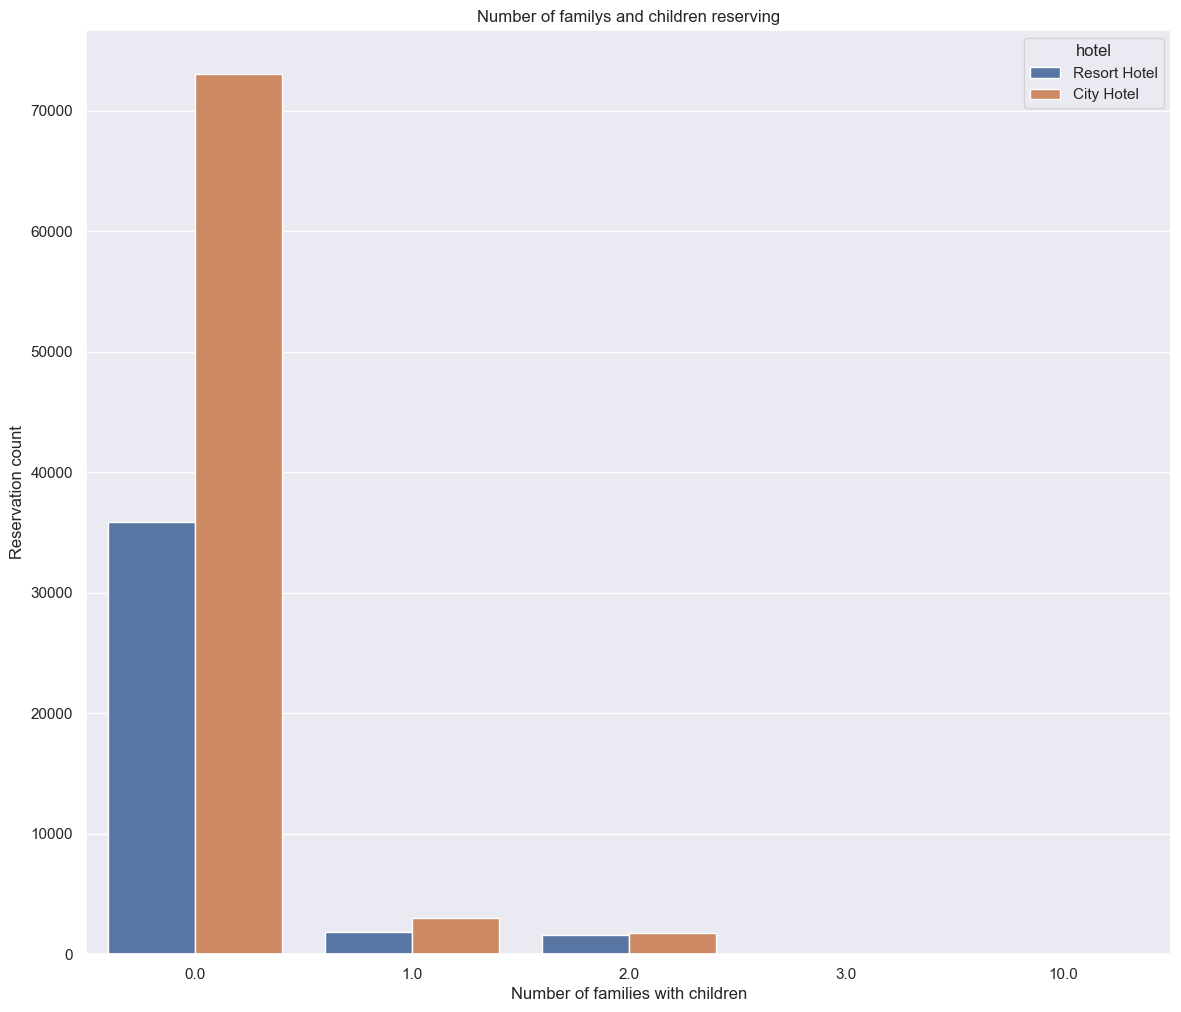

In [92]:
sns.set(rc={'figure.figsize':(14,12)})
graph = sns.countplot(x='children',data=hotel, hue='hotel')
graph.set(title='Number of familys and children reserving')
graph.set_xlabel('Number of families with children', fontsize=12)
graph.set_ylabel('Reservation count', fontsize=12)

Text(0, 0.5, 'Total gues count')

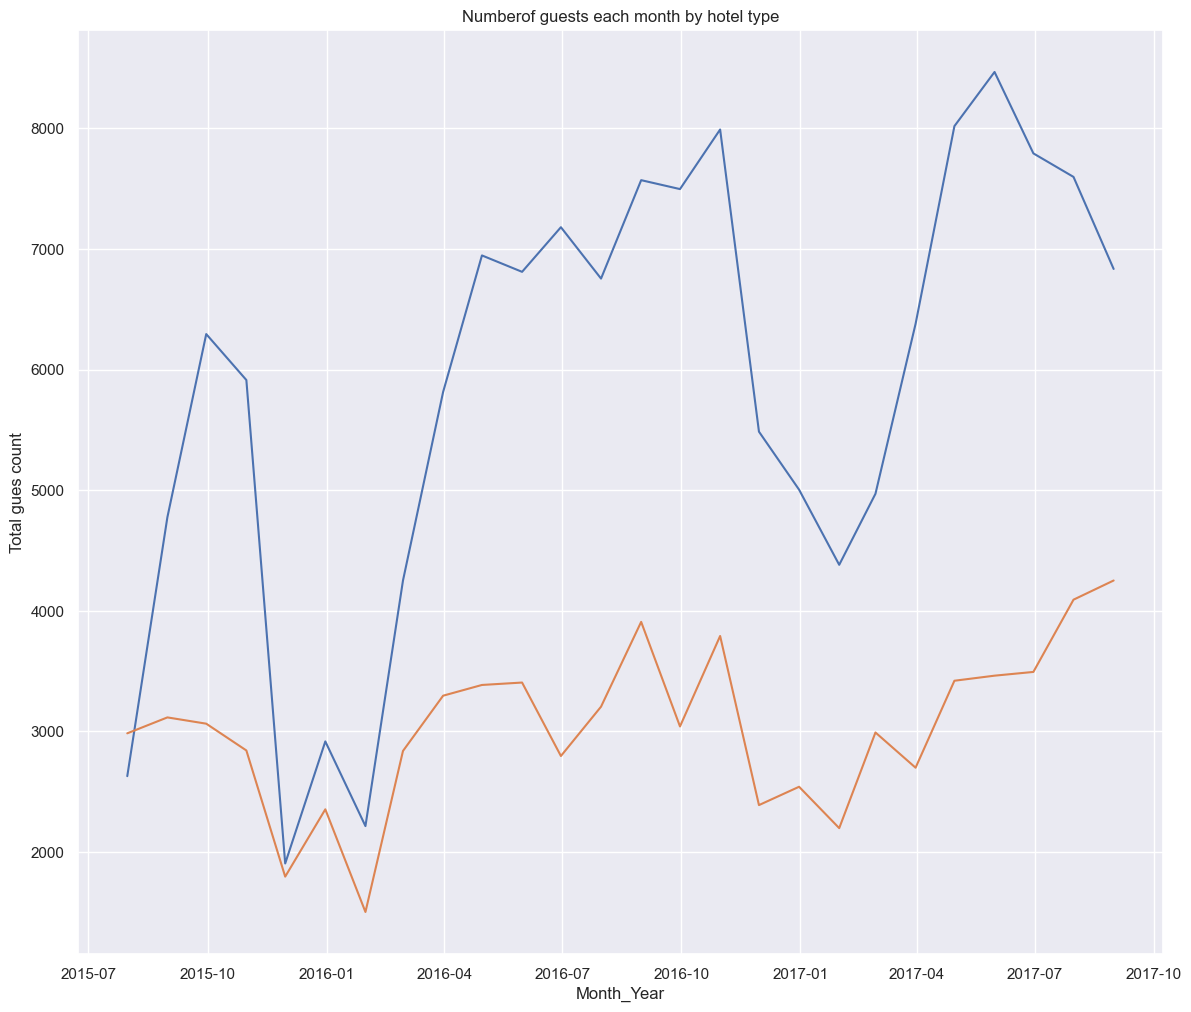

In [95]:
sns.set(rc={'figure.figsize':(14,12)})
fig, ax = plt.subplots()
sns.lineplot(
    data= hotel[hotel['hotel'] == 'City Hotel'].groupby(pd.Grouper(key='arrival_date',axis=0,
                                                                   freq='ME')).sum().reset_index(),
    x='arrival_date',
    y='total_guest',
    ax=ax
)
sns.lineplot(
    data= hotel[hotel['hotel'] == 'Resort Hotel'].groupby(pd.Grouper(key='arrival_date',axis=0,
                                                                   freq='ME')).sum().reset_index(),
    x='arrival_date',
    y='total_guest',
    ax=ax
)
ax.set(title='Numberof guests each month by hotel type')
ax.set_xlabel('Month_Year')
ax.set_ylabel('Total gues count',fontsize=12)

Text(0, 0.5, 'Parking spaces required')

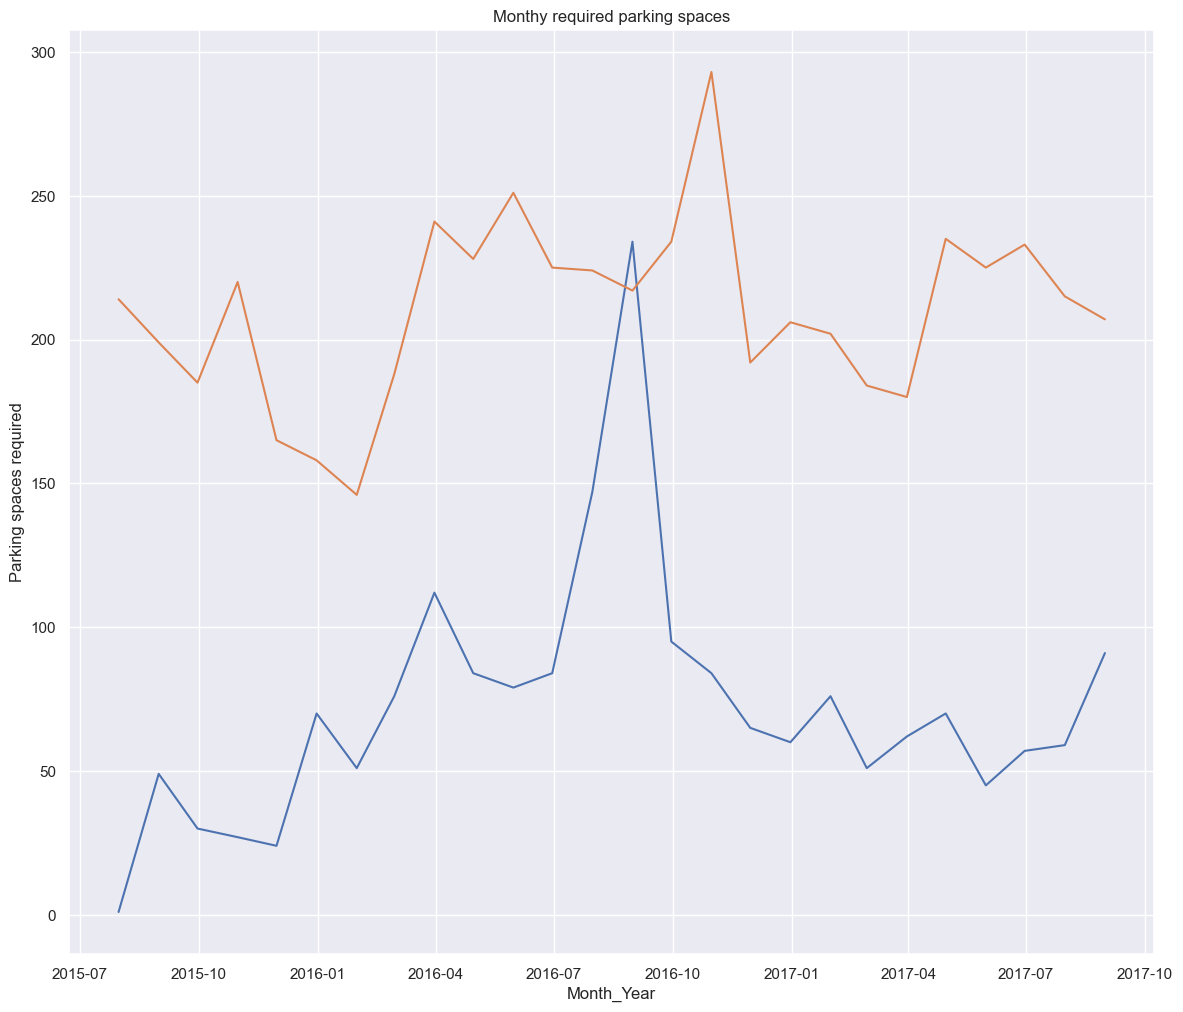

In [97]:
sns.set(rc={'figure.figsize':(14,12)})
fig, ax = plt.subplots()
sns.lineplot(
    data= hotel[hotel['hotel'] == 'City Hotel'].groupby(pd.Grouper(key='arrival_date',axis=0,
                                                                   freq='ME')).sum().reset_index(),
    x='arrival_date',
    y='required_car_parking_spaces',
    ax=ax
)
sns.lineplot(
    data= hotel[hotel['hotel'] == 'Resort Hotel'].groupby(pd.Grouper(key='arrival_date',axis=0,
                                                                   freq='ME')).sum().reset_index(),
    x='arrival_date',
    y='required_car_parking_spaces',
    ax=ax
)
ax.set(title='Monthy required parking spaces')
ax.set_xlabel('Month_Year')
ax.set_ylabel('Parking spaces required',fontsize=12)

EDA Conclusion

1. El Hotel City tiene el doble de reservas en comparación con el Hotel Resort durante el mismo período de tiempo.
2. Las cancelaciones para el Hotel City son significativamente más altas que para el Hotel Resort.
3. Las reservas tanto en hoteles de ciudad como en resorts alcanzan su pico en agosto y son más bajas en enero. De marzo a octubre parece ser su período más ocupado del año. Las reservas    caen de noviembre a enero.
4. La mayoría de las reservas son para 2 adultos, seguido de 1 adulto.
5. La mayoría de las reservas son de adultos con 0 niños, con un pequeño número teniendo 1 o 2 niños.
6. Hubo un aumento en el estacionamiento durante el mes de septiembre de 2016. El Hotel City ha tenido un número promedio de solicitudes de alrededor de 200 espacios de estacionamiento cada mes, excepto en febrero de 2016 donde cayó a 150, y en noviembre de 2016 donde casi alcanzó los 300.